In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
DS = xr.open_dataset("./barcelona_20181001-20181231_no2.nc")
DS

<xarray.Dataset>
Dimensions:        (lat: 907, lon: 1008, time: 2208)
Coordinates:
  * lat            (lat) float32 41.291256 41.291454 ... 41.472256 41.472454
  * lon            (lon) float32 2.057799 2.0579991 ... 2.258999 2.2591991
  * time           (time) datetime64[ns] 2018-10-01 ... 2018-12-31T23:00:00
Data variables:
    isValid        (time) uint8 ...
    no2            (time, lat, lon) float32 ...
    numObs         (time) uint8 ...
    precipitation  (time) float32 ...
    temperature    (time) float32 ...
    windU          (time) float32 ...
    windV          (time) float32 ...
Attributes:
    t_calculated:  2019-11-09T00:42:36.009092
    license:       This Lobelia Air Barcelona 2018 NO2 dataset is made availa...
    copyright:     © Lobelia Earth & KNMI 2019
    history:       Thu Nov 14 09:50:17 2019: ncks -d time,6552,8759 barcelona...
    NCO:           netCDF Operators version 4.8.1 (Homepage = http://nco.sf.n...

In [3]:
#specify just NO2 variable
da = DS.no2
da

<xarray.DataArray 'no2' (time: 2208, lat: 907, lon: 1008)>
[2018677248 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 41.291256 41.291454 41.291656 ... 41.472256 41.472454
  * lon      (lon) float32 2.057799 2.0579991 2.0581992 ... 2.258999 2.2591991
  * time     (time) datetime64[ns] 2018-10-01 ... 2018-12-31T23:00:00
Attributes:
    long_name:  NO2 concentration
    units:      ug m-3

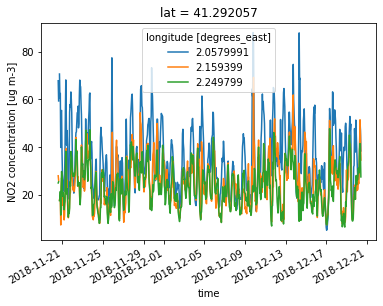

In [4]:
#select 3 points 
example = da.sel(lat=41.29206,lon=[2.057999, 2.159399, 2.249799], method='nearest')
#select time slice
example = example.sel(time=slice('2018-11-20T10:00:00', '2018-12-20T10:00:00'))
example.plot.line(x='time')

Goal 1: slice NO2 data array into data within this bounding box (project specifications):

In [ ]:
sant_marti_bounding_box = [[4.1405848,2.179021],[41.435017, 2.218338],[41.385540, 2.205916],[41.413917, 2.245273]]


Goal 2: slice further into data within this time slice (to further reduce file size):


In [ ]:
time=slice('2018-11-20T10:00:00', '2018-12-20T10:00:00')


Goal 3: export data as GeoJSON